In [1]:
import os
import re
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xml.etree.ElementTree as et
import io
import glob
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

# pd.options.display.max_rows = 9999
# pd.options.display.max_columns = 9999
# pd.set_option('display.max_colwidth', -1)

#tqdm_notebook.pandas()


In [2]:
df = pd.read_csv('cancerTrials.csv')

In [3]:
#df['intervention_name'] = df['intervention_name'].apply(', '.join)
df['intervention_name'] = df['intervention_name'].astype(str).str.replace('\[|\]|\'', '')

In [4]:
print(len(df))
df.head(3)

61777


,nct_id,brief_title,official_title,overall_status,start_date,completion_date,phase,study_type,brief_summary,detailed_description,enrollment,condition,intervention_name,eligibility
0,NCT00000124,Collaborative Ocular Melanoma Study (COMS),NaN,Unknown status,November 1986,NaN,Phase 3,Interventional,\n To evaluate therapeutic interventions ...,"\n For more than 100 years, removal of th...",NaN,Uveitis,"Brachytherapy, Eye Removal",\n Men and women eligible for the study...
1,NCT00000136,Studies of the Ocular Complications of AIDS (S...,Foscarnet-Ganciclovir CMV Retinitis Trial,Completed,March 1990,October 1991,Phase 3,Interventional,\n To evaluate the relative safety and ef...,\n CMV retinitis is the most common intra...,234.0,Cytomegalovirus Retinitis,"Ganciclovir, Foscarnet, Phosphonoacetic Acid, ...",\n Inclusion criteria:\n\n - ...
2,NCT00000395,Antifolate Effectiveness in Arthritis,Mechanisms of Antifolate Efficacy in Arthritis,Completed,September 1996,August 2002,Phase 2,Interventional,\n This study looks at how the arthritis ...,\n Low-dose methotrexate therapy suppress...,40.0,Adjuvant Arthritis,"Methotrexate, Folic Acid Antagonists, Folic Ac...",\n Inclusion Criteria:\n\n - ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61777 entries, 0 to 61776
Data columns (total 14 columns):
nct_id                  61777 non-null object
brief_title             61777 non-null object
official_title          60936 non-null object
overall_status          61777 non-null object
start_date              61777 non-null object
completion_date         56975 non-null object
phase                   47919 non-null object
study_type              61777 non-null object
brief_summary           61776 non-null object
detailed_description    43084 non-null object
enrollment              60236 non-null float64
condition               61777 non-null object
intervention_name       61777 non-null object
eligibility             61777 non-null object
dtypes: float64(1), object(13)
memory usage: 6.6+ MB


In [6]:
df.phase.unique()

array(['Phase 3', 'Phase 2', nan, 'Phase 1', 'Phase 1/Phase 2', 'Phase 4',
       'Phase 2/Phase 3', 'Early Phase 1'], dtype=object)

In [7]:
df.phase.value_counts()

Phase 2            20198
Phase 1            10738
Phase 3             7428
Phase 1/Phase 2     5273
Phase 4             2350
Phase 2/Phase 3     1060
Early Phase 1        872
Name: phase, dtype: int64

In [8]:
phase = df.phase.value_counts(ascending=False, sort=True).reset_index()
phase

,index,phase
0,Phase 2,20198
1,Phase 1,10738
2,Phase 3,7428
3,Phase 1/Phase 2,5273
4,Phase 4,2350
5,Phase 2/Phase 3,1060
6,Early Phase 1,872


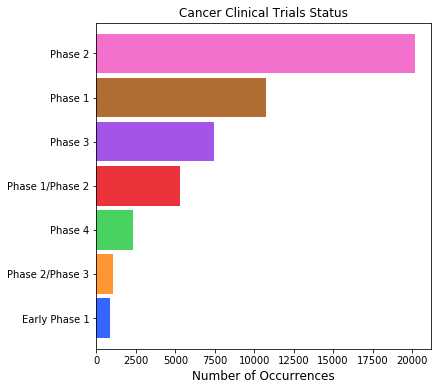

In [9]:
#df.phase.value_counts().plot(kind='barh')
plt.figure(figsize=(6,6))
df.phase.value_counts(ascending=True, sort=True).plot(kind='barh', width=0.9, color=sns.color_palette("bright", 7), alpha=0.8)
plt.title('Cancer Clinical Trials Status')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.savefig('./image/phase1.png', bbox_inches = "tight")

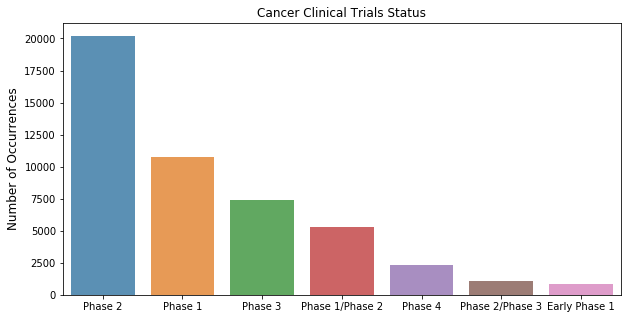

In [10]:
phase = df.phase.value_counts(ascending=False, sort=True)#.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(phase.index, phase.values, alpha=0.8)
plt.title('Cancer Clinical Trials Status')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('city', fontsize=12)
plt.savefig('./image/phase2.png')
plt.show()

In [11]:
df.head(1)

,nct_id,brief_title,official_title,overall_status,start_date,completion_date,phase,study_type,brief_summary,detailed_description,enrollment,condition,intervention_name,eligibility
0,NCT00000124,Collaborative Ocular Melanoma Study (COMS),NaN,Unknown status,November 1986,NaN,Phase 3,Interventional,\n To evaluate therapeutic interventions ...,"\n For more than 100 years, removal of th...",NaN,Uveitis,"Brachytherapy, Eye Removal",\n Men and women eligible for the study...


In [63]:
plt.figure(figsize=(6,6))
patient = df.groupby('phase')['enrollment'].aggregate({'enrolment':'mean'}).sort_values('enrolment',ascending=False).astype(int).reset_index()#.plot(kind='barh', width=0.9, color=sns.color_palette("bright", 7), alpha=0.8)
patient

C:\Users\Amrit\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,phase,enrolment
0,Phase 3,626
1,Phase 4,570
2,Phase 2/Phase 3,350
3,Phase 2,91
4,Early Phase 1,87
5,Phase 1/Phase 2,64
6,Phase 1,44


<Figure size 432x432 with 0 Axes>

In [61]:
patient.enrolment

0     44
1     64
2     87
3     91
4    350
5    570
6    626
Name: enrolment, dtype: int32

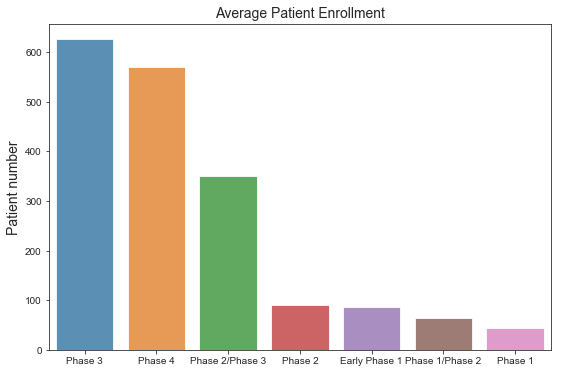

In [77]:
plt.figure(figsize=(9,6))
sns.barplot(patient.phase, patient.enrolment, alpha=0.8)
plt.title('Average Patient Enrollment', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Patient number', fontsize=14)
#plt.xlabel('city', fontsize=12)
plt.savefig('./image/patient_number.png')
plt.show()

# plt.plot(x = 'phase', y='mean', data=patient, kind='barh', width=0.9, color=sns.color_palette("bright", 7), alpha=0.8)
# plt.title('Average Patient Participation for ')
# plt.xlabel('Average Patient', fontsize=12)
# plt.savefig('./image/phase1.png', bbox_inches = "tight")

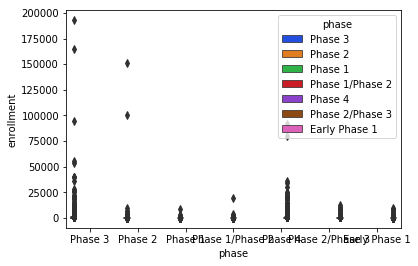

In [13]:
# grouped = data.groupby('month').agg("duration": [min, max, mean])
# grouped.columns = grouped.columns.droplevel(level=0)
# grouped.rename(columns={
#     "min": "min_duration", "max": "max_duration", "mean": "mean_duration"
# })
# grouped.head()
#df['enrollment'] = df['enrollment'].astype(int)
# patient = df.groupby('phase')['enrollment'].describe().unstack()
# patient = patient.astype(int)
# patient
# patient = df.groupby('phase')['enrollment'].aggregate(['min', np.median, max])
# patient = patient.astype(int)
#patient.columns = patient.columns.droplevel(level=0)
#grouped.rename(columns={
#    "min": "min_duration", "max": "max_duration", "mean": "mean_duration"
#3})
ax = sns.boxplot(x="phase", y="enrollment", hue='phase',data=df, palette='bright')

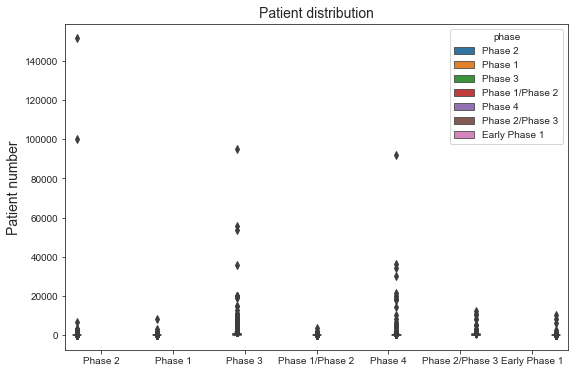

In [84]:
#sns.set(style="darkgrid", rc={'figure.figsize':(20,15)},color_codes=True,font_scale=3)
plt.figure(figsize=(9,6))
sns.set_style("ticks")
b = sns.boxplot(x='phase', y='enrollment',hue='phase', data=df)
#b.set(ylim=(0, 1000))
#plt.yticks(list(range(10000, 0, -1000)))
plt.title('Patient distribution', fontsize=14)
plt.xlabel('')           
plt.ylabel('Patient number', fontsize=14)
plt.savefig('./image/patient_stat.png');

#plt.savefig('character length of reviews.png');

In [15]:
df.overall_status.value_counts()

Completed                  26678
Recruiting                 12889
Active, not recruiting      5803
Terminated                  5695
Unknown status              5593
Not yet recruiting          2683
Withdrawn                   1749
Enrolling by invitation      363
Suspended                    324
Name: overall_status, dtype: int64

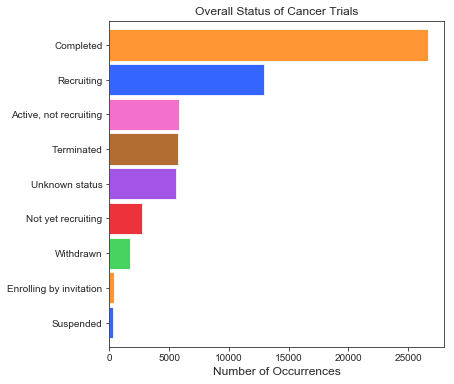

In [16]:
plt.figure(figsize=(6,6))
df.overall_status.value_counts(ascending=True, sort=True).plot(kind='barh', width=0.9, color=sns.color_palette("bright", 7), alpha=0.8)
plt.title('Overall Status of Cancer Trials')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.savefig('./image/status1.png', bbox_inches = "tight")

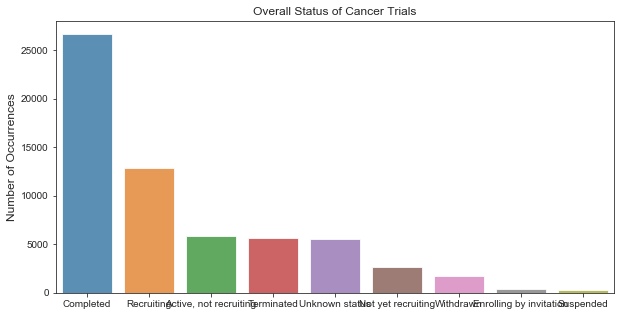

In [17]:
status = df.overall_status.value_counts(ascending=False, sort=True)#.reset_index()
plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Overall Status of Cancer Trials')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('city', fontsize=12)
plt.savefig('./image/status2.png')
plt.show()

In [18]:
df.overall_status.unique()

array(['Unknown status', 'Completed', 'Recruiting', 'Terminated',
       'Active, not recruiting', 'Withdrawn', 'Suspended',
       'Enrolling by invitation', 'Not yet recruiting'], dtype=object)

In [19]:
df.condition

0                                                  Uveitis
1                                Cytomegalovirus Retinitis
2                                       Adjuvant Arthritis
3                                  Spondylitis, Ankylosing
4                                        Vascular Diseases
5                                            Postmenopause
6                                      Myocardial Ischemia
7                                      Myocardial Ischemia
8                                      Myocardial Ischemia
9                                        Blood Transfusion
10                               Myelodysplastic Syndromes
11                               Myelodysplastic Syndromes
12                                          HIV Infections
13                                          HIV Infections
14                                   Graft vs Host Disease
15                            Immunoproliferative Disorder
16                              Zollinger Ellison Syndro

In [20]:
# Searching for conditions with related to cancer only
df.condition = df.condition.str.lower()

cancer = ["cancer" , "neoplasm" , "oma", "tumor"]

pattern = '|'.join(cancer)
#pattern

df['condition_cancer'] = df.condition.str.contains(pattern)

#df['condition_cancer'] = df.loc[df.condition.isin]

# def conditionCancerOnly(conditions):
#     filteredList = []
#     for c in cancer:
#         if isCancer(c):
#             filteredList.append(c )

#     return filteredList




In [21]:
df.head()

,nct_id,brief_title,official_title,overall_status,start_date,completion_date,phase,study_type,brief_summary,detailed_description,enrollment,condition,intervention_name,eligibility,condition_cancer
0,NCT00000124,Collaborative Ocular Melanoma Study (COMS),NaN,Unknown status,November 1986,NaN,Phase 3,Interventional,\n To evaluate therapeutic interventions ...,"\n For more than 100 years, removal of th...",NaN,uveitis,"Brachytherapy, Eye Removal",\n Men and women eligible for the study...,False
1,NCT00000136,Studies of the Ocular Complications of AIDS (S...,Foscarnet-Ganciclovir CMV Retinitis Trial,Completed,March 1990,October 1991,Phase 3,Interventional,\n To evaluate the relative safety and ef...,\n CMV retinitis is the most common intra...,234.0,cytomegalovirus retinitis,"Ganciclovir, Foscarnet, Phosphonoacetic Acid, ...",\n Inclusion criteria:\n\n - ...,False
2,NCT00000395,Antifolate Effectiveness in Arthritis,Mechanisms of Antifolate Efficacy in Arthritis,Completed,September 1996,August 2002,Phase 2,Interventional,\n This study looks at how the arthritis ...,\n Low-dose methotrexate therapy suppress...,40.0,adjuvant arthritis,"Methotrexate, Folic Acid Antagonists, Folic Ac...",\n Inclusion Criteria:\n\n - ...,False
3,NCT00000433,Blocking Tumor Necrosis Factor in Ankylosing S...,Anti-Tumor Necrosis Factor (TNFR:Fc) in Ankylo...,Completed,October 1999,March 2002,Phase 2,Interventional,\n The Division of Rheumatology at Univer...,\n In this Phase II clinical trial we wil...,42.0,"spondylitis, ankylosing",Anti-Tumor Necrosis Factor,\n Inclusion Criteria:\n\n - ...,False
4,NCT00000479,Women's Health Study (WHS): A Randomized Trial...,Women's Health Study of Low-dose Aspirin and V...,Completed,September 1992,February 2005,Phase 3,Interventional,\n The purpose of this study is to evalua...,\n BACKGROUND:\n\n Various doses of ...,39876.0,vascular diseases,"Vitamins, Vitamin E, Tocopherols, Tocotrienols...",\n Inclusion Criteria:\n\n - ...,False


In [22]:
df = df.loc[df['condition_cancer'] ==True,:]

In [23]:
df.shape

(42725, 15)

In [24]:
df.condition.value_counts()

breast cancer                                                                                            2919
prostate cancer                                                                                          1888
colorectal cancer                                                                                        1012
lung cancer                                                                                              1009
multiple myeloma                                                                                          996
cancer                                                                                                    972
lymphoma                                                                                                  855
non-small cell lung cancer                                                                                731
pancreatic cancer                                                                                         659
unspecifie

In [25]:
condition = df.condition.value_counts(ascending=False, sort=True)
condition.index[:10]

Index(['breast cancer', 'prostate cancer', 'colorectal cancer', 'lung cancer',
       'multiple myeloma', 'cancer', 'lymphoma', 'non-small cell lung cancer',
       'pancreatic cancer',
       'unspecified adult solid tumor, protocol specific'],
      dtype='object')

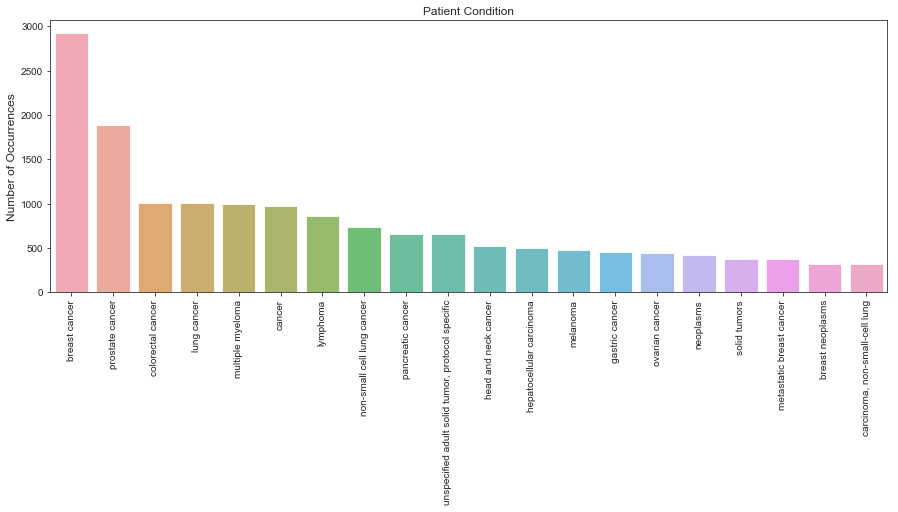

In [26]:
condition = df.condition.value_counts(ascending=False, sort=True)
plt.figure(figsize=(15,5))
sns.barplot(condition.index[:20], condition.values[:20], alpha=0.8)
plt.title('Patient Condition')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('./image/condition.png', bbox_inches = "tight")
plt.show()

In [27]:

df.intervention_name.value_counts()

Vaccines                                                                                                                                                                                                                                                                                                                                                                                               492
Pembrolizumab                                                                                                                                                                                                                                                                                                                                                                                          392
Paclitaxel, Albumin-Bound Paclitaxel                                                                                                                                                                              

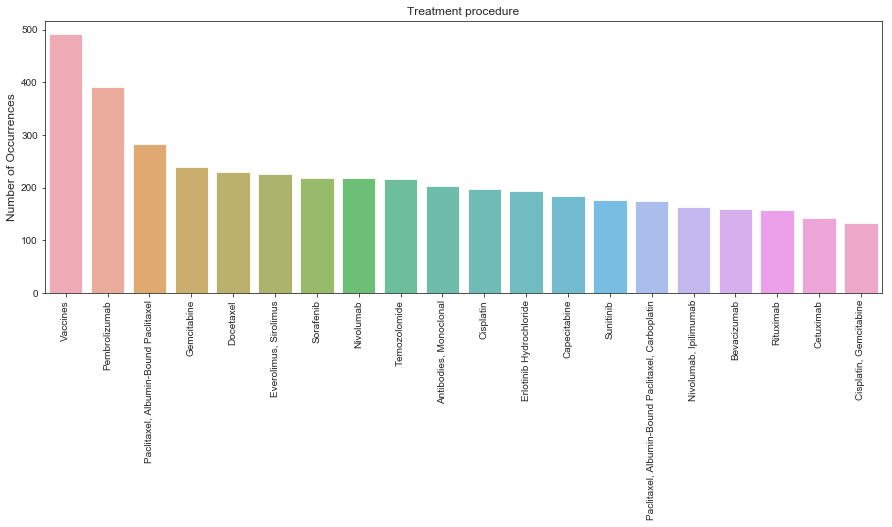

In [28]:
intervention = df.intervention_name.value_counts(ascending=False, sort=True)
plt.figure(figsize=(15,5))
sns.barplot(intervention.index[:20], intervention.values[:20], alpha=0.8)
plt.title('Treatment procedure')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('city', fontsize=12)
plt.xticks(rotation=90)
plt.savefig('./image/intervention.png', bbox_inches = "tight")
plt.show()

In [29]:
df.head(3)

,nct_id,brief_title,official_title,overall_status,start_date,completion_date,phase,study_type,brief_summary,detailed_description,enrollment,condition,intervention_name,eligibility,condition_cancer
17,NCT00001188,The Role of Multi-Modality Therapy for the Tre...,The Role of Multi-Modality Therapy for the Tre...,Completed,December 1983,September 2000,Phase 2,Interventional,\n Patients with Grade II and III soft ti...,\n Patients with Grade II and III soft ti...,100.0,sarcoma,radiation therapy following surgery,\n Patients must have biopsy-proven sof...,True
18,NCT00001189,"The Treatment of Grade I Sarcomas and Benign, ...","The Treatment of Grade I Sarcomas and Benign, ...",Completed,December 1983,April 2001,Phase 2,Interventional,\n Patients with Grade I soft tissue sarc...,\n This is a randomized study. Patients u...,150.0,neoplasms,radiotherapy,\n DISEASE CHARACTERISTICS:\n\n ...,True
20,NCT00001193,A Multimodality Treatment Approach to Patients...,A Multimodality Treatment Approach to Patients...,Completed,November 1984,September 2000,Phase 2,Interventional,\n This study is designed to evaluate the...,\n This study is designed to evaluate the...,200.0,neoplasm metastasis,Melphalan,\n Patients must have a histologically ...,True


In [30]:
# Extracting Inclusion/Exclusion criteria from eligibility column
df.eligibility = df.eligibility.str.lower()
df['eligible'] = df.eligibility.str.split('(inclusion criteria:)').str[2]
df['ineligible'] = df.eligibility.str.split('(exclusion criteria:)').str[2]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42725 entries, 17 to 61776
Data columns (total 17 columns):
nct_id                  42725 non-null object
brief_title             42725 non-null object
official_title          42169 non-null object
overall_status          42725 non-null object
start_date              42725 non-null object
completion_date         38927 non-null object
phase                   34821 non-null object
study_type              42725 non-null object
brief_summary           42724 non-null object
detailed_description    29941 non-null object
enrollment              41413 non-null float64
condition               42725 non-null object
intervention_name       42725 non-null object
eligibility             42725 non-null object
condition_cancer        42725 non-null bool
eligible                36042 non-null object
ineligible              34798 non-null object
dtypes: bool(1), float64(1), object(15)
memory usage: 5.6+ MB


In [32]:
df.head(100)

,nct_id,brief_title,official_title,overall_status,start_date,completion_date,phase,study_type,brief_summary,detailed_description,enrollment,condition,intervention_name,eligibility,condition_cancer,eligible,ineligible
17,NCT00001188,The Role of Multi-Modality Therapy for the Tre...,The Role of Multi-Modality Therapy for the Tre...,Completed,December 1983,September 2000,Phase 2,Interventional,\n Patients with Grade II and III soft ti...,\n Patients with Grade II and III soft ti...,100.0,sarcoma,radiation therapy following surgery,\n patients must have biopsy-proven sof...,True,NaN,NaN
18,NCT00001189,"The Treatment of Grade I Sarcomas and Benign, ...","The Treatment of Grade I Sarcomas and Benign, ...",Completed,December 1983,April 2001,Phase 2,Interventional,\n Patients with Grade I soft tissue sarc...,\n This is a randomized study. Patients u...,150.0,neoplasms,radiotherapy,\n disease characteristics:\n\n ...,True,NaN,NaN
20,NCT00001193,A Multimodality Treatment Approach to Patients...,A Multimodality Treatment Approach to Patients...,Completed,November 1984,September 2000,Phase 2,Interventional,\n This study is designed to evaluate the...,\n This study is designed to evaluate the...,200.0,neoplasm metastasis,Melphalan,\n patients must have a histologically ...,True,NaN,NaN
21,NCT00001209,A Pilot Study for the Treatment of Patients Wi...,A Pilot Study for the Treatment of Patients Wi...,Completed,October 1986,August 2000,Phase 1,Interventional,\n This protocol is designed to test the ...,\n This protocol is designed to test the ...,120.0,"sarcoma, ewing's","Vincristine, Doxorubicin, Ifosfamide, Cyclopho...",\n patients with high grade soft tissue...,True,NaN,NaN
22,NCT00001217,Osteosarcoma Study #2: A Randomized Trial of P...,Osteosarcoma Study #2: A Randomized Trial of P...,Completed,May 1987,December 2000,Phase 3,Interventional,\n The study is designed to determine if ...,\n The study is designed to determine if ...,260.0,osteosarcoma,pre-surgical chemotherapy,\n must be less than or equal to 30 yea...,True,NaN,NaN
25,NCT00001237,Pilot Protocol for the Treatment of Patients W...,Pilot Protocol for the Treatment of Patients W...,Completed,March 1989,April 2000,Phase 2,Interventional,\n Major improvements in the treatment of...,\n Major improvements in the treatment of...,120.0,"lymphoma, small noncleaved-cell",Sargramostim,\n high risk protocol: patients with sm...,True,NaN,NaN
26,NCT00001239,Combination Chemotherapy (FLAC) Combined With ...,Combination Chemotherapy (FLAC) Combined With ...,Completed,July 1989,January 2001,Phase 2,Interventional,\n To evaluate a dose intensive chemother...,\n To evaluate a dose intensive chemother...,100.0,breast neoplasms,Sargramostim,\n all stage iii or clinical t3n0 or tx...,True,NaN,NaN
27,NCT00001249,Treatment of Tac-Expressing Cutaneous T-Cell L...,Treatment of Tac-Expressing Cutaneous T-Cell L...,Completed,December 1989,October 2000,Phase 1,Interventional,\n The study purpose is to evaluate the c...,\n The study purpose is to evaluate the c...,30.0,"lymphoma, t-cell, cutaneous","Antibodies, Daclizumab",\n disease characteristics:\n\n ...,True,NaN,NaN
28,NCT00001250,Effect of Preoperative Chemotherapy on Axillar...,Effect of Preoperative Chemotherapy on Axillar...,Completed,December 1989,October 2002,Phase 2,Interventional,\n Patients with untreated clinical stage...,\n A prospective randomized trial evaluat...,130.0,neoplasm metastasis,preoperative dose intense chemotherapy (FLAC/G...,\n inclusion criteria\n\n women ...,True,NaN,NaN
29,NCT00001251,Phase I Study of Intrathecal Mafosfamide,Phase I Study of Intrathecal Mafosfamide,Completed,November 1989,November 2003,Phase 1,Interventional,\n The purpose of this study is to determ...,\n The purpose of this study is to determ...,65.0,meningeal neoplasm,"Mafosfamide, Cyclophosphamide",\n inclusion criteria:\n\n all p...,True,\n\n all patients over 3 years of age w...,\n\n patients receiving other therapy (...


In [33]:
df2=df[df['eligible'].notnull()]
df3=df2[df['ineligible'].notnull()]
df3.shape

C:\Users\Amrit\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(34494, 17)

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34494 entries, 29 to 61776
Data columns (total 17 columns):
nct_id                  34494 non-null object
brief_title             34494 non-null object
official_title          33991 non-null object
overall_status          34494 non-null object
start_date              34494 non-null object
completion_date         32854 non-null object
phase                   27400 non-null object
study_type              34494 non-null object
brief_summary           34493 non-null object
detailed_description    22562 non-null object
enrollment              34382 non-null float64
condition               34494 non-null object
intervention_name       34494 non-null object
eligibility             34494 non-null object
condition_cancer        34494 non-null bool
eligible                34494 non-null object
ineligible              34494 non-null object
dtypes: bool(1), float64(1), object(15)
memory usage: 4.5+ MB


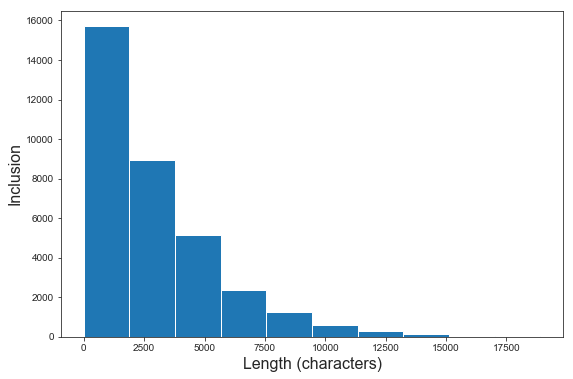

In [35]:
eligible_length = df3['eligible'].map(len)

plt.figure(figsize=(9,6))
plt.hist(eligible_length)
plt.xlabel('Length (characters)', fontsize=16)
plt.ylabel('Inclusion', fontsize=16)
plt.savefig('./image/inclusion.png', bbox_inches = "tight")
plt.show()

In [36]:
#df.description[0]
Text=df3.eligible[0]
Text

KeyError: 0

In [ ]:
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
Text=df3['eligible'][:0]

wc=WordCloud().generate(Text)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
ineligible_length = df3['eligible'].map(len)

plt.figure(figsize=(9,6))
plt.hist(ineligible_length)
plt.xlabel('Length (characters)', fontsize=16)
plt.ylabel('Exclusion', fontsize=16)
plt.savefig('./image/Exclusion.png', bbox_inches = "tight")
plt.show()

In [ ]:
df4 = df3[['condition','intervention_name', 'eligible', 'ineligible']]
df4.head()

In [ ]:
df4.condition = df4.condition.str.lower()
df4.condition = df4.condition.str.replace('/', ' ')
df4.condition = df4.condition.str.replace('-', ' ')
df4.condition = df4.condition.str.strip()

In [ ]:
df4.condition.value_counts()

In [ ]:
condition_select = ['breast cancer', 'prostate cancer' 'colorectal cancer', 'lung cancer',
                    'multiple myeloma', 'lymphoma', 'non-small cell lung cancer'
                    'pancreatic cancer', 'head and neck cancer', 'hepatocellular carcinoma',
                    'melanoma', 'gastric cancer', 'ovarian cancer', 'solid tumors',
                    'metastatic breast cancer']

df10 = df4
def add_condition(condition):
    for catagory in condition_select:
        if catagory == condition:
            return catagory
        
    return None

df10['cancer_type'] = df10.condition.apply(add_condition)
df10.head(100)

In [ ]:
df11 = df10[['cancer_type', 'eligible', 'ineligible']]

In [ ]:
df11 = df11.loc[df11.cancer_type.notnull()]

In [ ]:
df11.head()

In [ ]:
df11.to_csv('df11.csv')

In [ ]:
df12 = df11.groupby('cancer_type')['eligible'].apply(' '.join).reset_index()

In [ ]:
df12.info()

In [ ]:
df12.cancer_type.value_counts()

In [ ]:
df12.head()

In [ ]:
df12.to_csv('df12.csv')

In [ ]:
df4.eligible[30]

In [ ]:
# Wordcounts for eligible
df4['word_count_eligible'] = df4['eligible'].apply(lambda x: len(str(x).split(" ")))
df4['word_count_ineligible'] = df4['ineligible'].apply(lambda x: len(str(x).split(" ")))
df4[['word_count_eligible','word_count_ineligible']].head().sort_values('word_count_eligible', ascending=False)

In [ ]:
df4.word_count_eligible.describe()

In [ ]:
df4.word_count_ineligible.describe()

In [ ]:
#Identify common words
freq_eli = pd.Series(' '.join(df4['eligible']).split()).value_counts()[:20]
freq_eli

In [ ]:
#Identify uncommon words
least_eli = pd.Series(' '.join(df4['eligible']).split()).value_counts()[-20:]
least_eli

In [ ]:
freq_in = pd.Series(' '.join(df4['ineligible']).split()).value_counts()[:20]
freq_in

In [ ]:
clean_text = []
#def cleanText(file):
for index in range(len(df4.eligible)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(index))

    #Convert to lowercase
    text = text.lower()

    # Additiona characters
    #text_col_tags = re.sub("[!@#$+%*:()'-]", ' ', text_col_lower)

    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)

    ##Convert to list from string
    text = text.split()

#     ##Stemming
#     ps=PorterStemmer()
#     text = [ps.stem(word) for word in text] 

    #Lemmatisation
#     word_lemma = WordNetLemmatizer()
#     text = [word_lemma.lemmatize(word) for word in text] 
    text = " ".join(text)
    clean_text.append(text)
    
df4['clean_text'] = clean_text

In [ ]:
df4.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df4.eligible
tfidf= TfidfVectorizer(ngram_range = (1,3), min_df = 10,sublinear_tf=True)
X =tfidf.fit_transform(X.ravel())

In [ ]:
y = df4.condition

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTEENN
from sklearn.utils import class_weight
#import os

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [ ]:
mnb = MultinomialNB(alpha = 0.001,fit_prior=True)
mnb.fit(X_train,y_train)

In [ ]:
mnb_predictions = mnb.predict(X_test)
print(confusion_matrix(y_test,mnb_predictions))
print('\n', 'Classification report')
print(classification_report(y_test,mnb_predictions))
# Print the overall accuracy
print('\n', 'accuracy Score')
print(metrics.accuracy_score(y_test,mnb_predictions))

print('\n', 'f1 Score')
print(metrics.f1_score(y_test, mnb_predictions, average='weighted'))

In [ ]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split()]# if word.lower() not in stopwords.words('english')]

In [ ]:
df4['new'] = df4.eligible.apply(text_process)

In [ ]:
df4.head()

In [ ]:
df5 = df4.groupby('condition')['eligible'].apply(' '.join).reset_index()

In [ ]:
df5.condition.value_counts()

In [ ]:
condition_select = ['breast cancer', 'prostate cancer' 'colorectal cancer', 'lung cancer',
                    'multiple myeloma', 'lymphoma', 'non-small cell lung cancer'
                    'pancreatic cancer', 'head and neck cancer', 'hepatocellular carcinoma',
                    'melanoma', 'gastric cancer', 'ovarian cancer', 'solid tumors',
                    'metastatic breast cancer']

# df5['condition_select'] = df5.condition.str.contains('|'.join(condition_select))
# df5.head()

def add_condition(condition):
    for catagory in condition_select:
        if catagory == condition:
            return catagory
        
    return None

df5['cancer_type'] = df5.condition.apply(add_condition)
df5.head(100)



In [ ]:
df6 = df5[df5.condition_select == True]
df6.head()

In [ ]:
df6.info()

In [ ]:
df6.condition.value_counts()

In [ ]:
df4['eligible'][df4.condition == 'breast cancer']

In [ ]:
df4.eligible[30]

In [ ]:
#cleanText(df4.eligible)
for index in range(len(df4.eligible)):
    print(index)

In [ ]:
dp6 = df.sample(10)
dp6.eligibility = dp6.eligibility.str.lower()
dp6['eli'] = dp6.eligibility.str.split('(inclusion criteria:)').str[2]#apply(pd.Series)[[0]].rename(columns={0: 'eligible'})
dp6.head(1)

In [ ]:
print(dp6.eli.to_string(index=False))

In [ ]:
for v in dp6.eli:
    print(v)

In [ ]:
#dp.eligibility.str.split('inclusion criteria:')

cancer = ["inclusion criteria" , "neoplasm" , "oma", "tumor"]

pattern = '|'.join(cancer)
pattern




In [ ]:
df.eligibility = df.eligibility.str.lower()
df['eligible'] = df.eligibility.str.contains('inclusion criteria')
df2 = df.loc[df['eligible'] ==True,:]
df2.shape

In [ ]:
df.eligibility = df.eligibility.str.lower()
df['eligible'] = df.eligibility.str.contains('inclusion criteria')
df4 = df.loc[df['eligible'] ==False,:]
print(df4.shape)
df4.head()

In [ ]:
df4.iloc[0,13]

In [ ]:
pd.Series(['a1', 'b2', 'c3'])

In [ ]:
pd.Series(['a1', 'b2', 'c3']).str.extract(r'([ab])(\d)', expand=False)

In [ ]:
df.eligibility = df.eligibility.str.lower()
df['ineligible'] = df.eligibility.str.contains('exclusion criteria')
df3 = df.loc[df['ineligible'] ==True,:]
df3.shape

In [ ]:
df.eligibility = df.eligibility.str.lower()
df['ineligible'] = df.eligibility.str.contains('exclusion criteria')
df5 = df.loc[df['ineligible'] ==False,:]
print(df5.shape)
df5.head()

In [ ]:
# dp.eligibility = dp.eligibility.str.lower()
# dp2 = dp.eligibility.str.split('(*inclusion criteria*:|*exclusion criteria*:)').apply(pd.Series)[[2,4]].rename(columns={2: 'eligible', 4: 'ineligible'})
# dp2.head()

In [ ]:
dp = df.sample(10)
dp.head()

In [ ]:
#dp = df.sample(100)
dp.eligibility = dp.eligibility.str.lower()
dp3 = dp.eligibility.str.split('(\**inclusion criteria\**:|\**exclusion criteria\**:)').apply(pd.Series)[[2,4]].rename(columns={2: 'eligible', 4: 'ineligible'})

In [ ]:
print(dp.eligibility.values)

In [ ]:
file_path = "./data/search_result/NCT00000479.xml"

parse_XML(file_path)

In [ ]:
for child in root:
    print(child.tag, child.attrib)

In [ ]:
from xmljson import badgerfish as bf
from xml.etree.ElementTree import fromstring

In [ ]:
!python -m xmljson -d badgerfish ./data/search_result/NCT00000479.xml

In [ ]:
!for f in $(ls | grep '.xml'); do python -m xmljson -d yahoo $f > $json/f.json ; done

In [ ]:
df.head()

In [ ]:
for child in root:
    print(child.tag, child.attrib)

In [ ]:
dfcols = ['clinical_study', 'nct_id', 'brief_title']
df = pd.DataFrame(columns=dfcols)

for i in etree.iter(tag='data'):
df = df.append(
        pd.Series([i.get('id'), i.get('name')], index=dfcols),
        ignore_index=True)
df.head()

In [ ]:
trials.head()

In [ ]:
# Retrieve Tweets
MaxTweets = 10000000
tweetsPerQry = 100
fName = 'tweets.txt' # Storage name

tweetCount = 0
print("Downloading max {0} tweets".format(MaxTweets))
with open(fName, 'w') as f:
    for tweet in tweepy.Cursor(api.search,q=query, wait_on_rate_limit=True).items(MaxTweets) :         

        # Verify the tweet has place info before writing
        if tweet.place is not None:
            
            #Write to the text file, and add one to the number of tweets
            f.write(jsonpickle.encode(tweet._json, unpicklable=False) + '\n')
            tweetCount += 1

    #Display how many tweets we have collected
    print("Downloaded {0} tweets".format(tweetCount))
    

In [ ]:
# Checking the data
tweet._json

In [ ]:
max_id = -1
tweetCount = 0
with open('PoGo_USA_Tutorial.json', 'w') as f:
    #While we still want to collect more tweets
    while tweetCount < MaxTweets:
        try:
            #Look for more tweets, resuming where we left off
            if max_id <= 0:
                new_tweets = api.search(q=query, count=tweetsPerQry)
            else:
                new_tweets = api.search(q=query, count=tweetsPerQry, max_id=str(max_id - 1))
            
            #If we didn't find any exit the loop
            if not new_tweets:
                print("No more tweets found")
                break
            
            #Write the JSON output of any new tweets we found to the output file
            for tweet in new_tweets:
                
                #Make sure the tweet has place info before writing
                if (tweet.place is not None) and (tweetCount < MaxTweets):
                    f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
                    tweetCount += 1
                    
            #Display how many tweets we have collected
            print("Downloaded {0} tweets".format(tweetCount))
            
            #Record the id of the last tweet we looked at
            max_id = new_tweets[-1].id
            
        except tweepy.TweepError as e:
            
            #Print the error and continue searching
            print("some error : " + str(e))


print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

In [ ]:
#search for multiple phrases using OR (for Pharma companies)
Allquery = "'Johnson & Johnson' or 'J & J' or 'J&J' or 'JNJ' or '$JNJ' \
        or 'Pfizer' or 'pfizer' or 'PFE' or '$PFE' \
        or 'Novartis' or 'novartis' or 'NOVN' or '$NOVN' \
        or 'Roche' or 'roche' or 'ROG' or '$ROG' \
        or 'Merck & Co.' or 'Merck' or 'MRK' or '$MRK' \
        or 'AbbVie' or 'abbvie' or 'ABBV' or '$ABBV' \
        or 'Eli Lilly' or 'EliLilly' or 'LLY' or '$LLY' \
        or 'Sanofi' or 'sanofi' or 'SAN' or '$SAN' \
        or 'AstraZeneca' or 'astrazeneca' or 'AZN' or '$AZN' \
        or 'GlaxoSmithKline' or 'GSK' or '$GSK'"